<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Day17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fruit Classification using CNN**
####Self Practice on CNN based on theoritical understanding

In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
# upload the dataset and unzip it
# the Fruit-360 dataset Version 1 is used having kaggle link https://www.kaggle.com/datasets/moltean/fruits/versions/1
!unzip fruits_data_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits_data_set/Training/Plum/172_100.jpg  
  inflating: fruits_data_set/Training/Plum/173_100.jpg  
  inflating: fruits_data_set/Training/Plum/174_100.jpg  
  inflating: fruits_data_set/Training/Plum/175_100.jpg  
  inflating: fruits_data_set/Training/Plum/176_100.jpg  
  inflating: fruits_data_set/Training/Plum/177_100.jpg  
  inflating: fruits_data_set/Training/Plum/178_100.jpg  
  inflating: fruits_data_set/Training/Plum/179_100.jpg  
  inflating: fruits_data_set/Training/Plum/17_100.jpg  
  inflating: fruits_data_set/Training/Plum/180_100.jpg  
  inflating: fruits_data_set/Training/Plum/181_100.jpg  
  inflating: fruits_data_set/Training/Plum/182_100.jpg  
  inflating: fruits_data_set/Training/Plum/183_100.jpg  
  inflating: fruits_data_set/Training/Plum/184_100.jpg  
  inflating: fruits_data_set/Training/Plum/185_100.jpg  
  inflating: fruits_data_set/Training/Plum/186_100.jpg  
  inflating: fruits_data_set/Training/

In [5]:
# set dataset paths
train_dir = 'fruits_data_set/Training'
val_dir = 'fruits_data_set/Validation'

In [6]:
# images preprocessing
IMG_SIZE = 64
BATCH_SIZE = 32

# training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# validation generator only rescales
val_datagen = ImageDataGenerator(rescale=1./255)

# load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 11585 images belonging to 25 classes.
Found 3867 images belonging to 25 classes.


In [7]:
# built the CNN
NUM_CLASSES = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,377 (6.21 MB)

 Trainable params: 1,628,377 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# trained the CNN
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 101s 273ms/step - accuracy: 0.2365 - loss: 2.4821 - val_accuracy: 0.8242 - val_loss: 0.6901
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 97s 268ms/step - accuracy: 0.6251 - loss: 1.0417 - val_accuracy: 0.8800 - val_loss: 0.3659
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 98s 271ms/step - accuracy: 0.7231 - loss: 0.7352 - val_accuracy: 0.9219 - val_loss: 0.2830
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 141s 269ms/step - accuracy: 0.7756 - loss: 0.6084 - val_accuracy: 0.9085 - val_loss: 0.2447
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 135s 251ms/step - accuracy: 0.8050 - loss: 0.5291 - val_accuracy: 0.9279 - val_loss: 0.2083
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 90s 248ms/step - accuracy: 0.8219 - loss: 0.4712 - val_accuracy: 0.9519 - val_loss: 0.1708
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 94s 258ms/step - accuracy: 0.8308 - loss: 0.4453 - val_accuracy: 0.9082 - val_loss: 0.2646
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 93s 256ms/step - accuracy: 0.8489 - loss

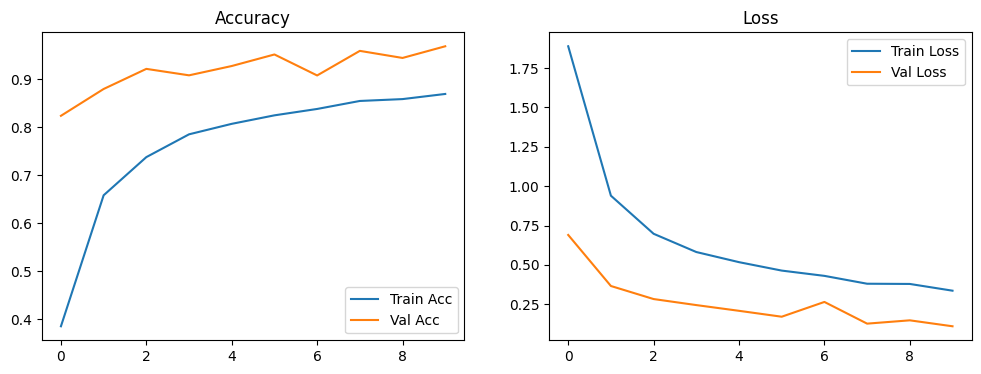

In [9]:
# plotted of accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class: Apple Red 1


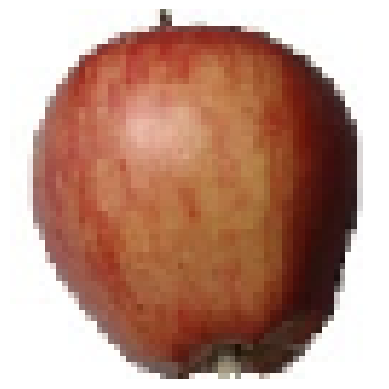

In [12]:
# seen the testing on single image
import numpy as np
from tensorflow.keras.preprocessing import image

# Replace with your own test image path
img_path = 'fruits_data_set/Validation/Apple Red 1/321_100.jpg'

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_index = np.argmax(pred[0])
class_labels = list(train_generator.class_indices.keys())

print("Predicted Class:", class_labels[class_index])

plt.imshow(img)
plt.axis('off')
plt.show()